<a href="https://colab.research.google.com/github/ObLun27/Estadistica/blob/main/Unidad5/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

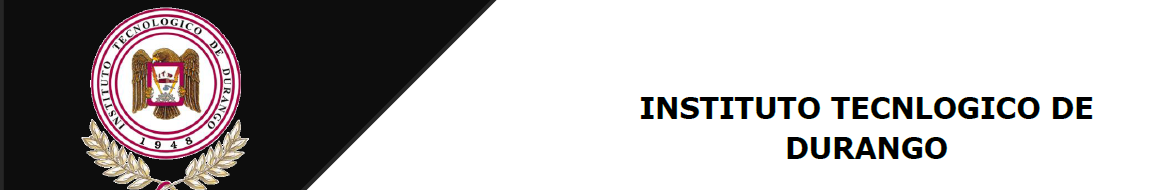
#Probabilidad y estadística
##Unidad 5
Practica 1

Grupo 2YY

Alumno: Obed Alejandro Luna García

Maestro: Dr. José Gabriel Rodríguez Rivas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [4]:
lm = LinearRegression

# Variables independientes o variables predictoras
x = autos2[["city-mpg"]]

# Variable dependiente o variables objetivo a predecir
y = autos2["price"]
x.head(10)

,city-mpg
0,21
1,21
2,19
3,24
4,18
5,19
6,19
7,19
8,17
9,23


In [5]:
# Entrenar el algoritmo de regresión lineal
lm = LinearRegression()
lm.fit(x, y)
# Realizamos la fase de prediccion
Ypredict = lm.predict(x)

In [6]:
# Valor de la pendiente
lm.intercept_

np.float64(34595.600842778265)

In [7]:

# Valor del coeficiente o peso de la variable
lm.coef_

array([-849.45322454])

In [8]:
Ypred = 34595.600 - 849.45 * 24

In [9]:
Ypred

14208.799999999996

In [10]:
Consumos3Vehiculos = [[24], [12], [8]]

In [11]:
lm.predict(Consumos3Vehiculos)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14208.72345381, 24402.16214829, 27799.97504646])

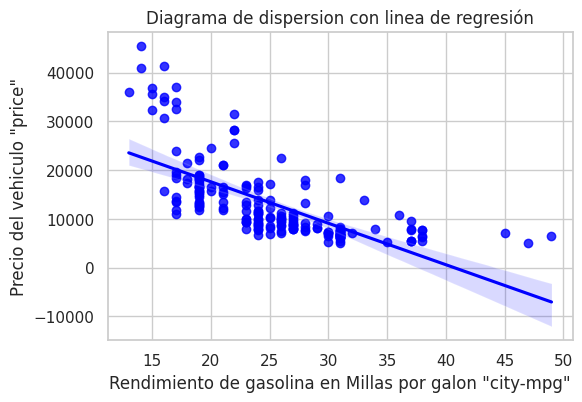

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#Definir tamaño
plt.figure(figsize=(6,4))
#Crear el diagrama de dispersion con linea de regresion
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color="blue")
plt.title('Diagrama de dispersion con linea de regresión')
plt.xlabel('Rendimiento de gasolina en Millas por galon "city-mpg"')
plt.ylabel('Precio del vehiculo "price"')
plt.grid(True)
plt.show()

##Regresion Lineal Multiple

In [13]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "curb-weight", "price"]].corr()

,horsepower,engine-size,city-mpg,wheel-base,curb-weight,price
horsepower,1.000000,0.822668,-0.822192,0.371178,0.757981,0.809607
engine-size,0.822668,1.000000,-0.650546,0.572027,0.849072,0.872335
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.749543,-0.686571
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.782097,0.584642
curb-weight,0.757981,0.849072,-0.749543,0.782097,1.000000,0.834415
price,0.809607,0.872335,-0.686571,0.584642,0.834415,1.000000


In [14]:
#Variables predictoras para la fase de entrenamiento
x = autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]
#Variable objetivo a predecir
y = autos2[["price"]]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
autos2_train, autos2_test = train_test_split(autos2, random_state = 0)

In [17]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]].corr()
#Variable objetivo a predecir

,horsepower,engine-size,city-mpg,wheel-base,bore
horsepower,1.000000,0.822668,-0.822192,0.371178,0.566903
engine-size,0.822668,1.000000,-0.650546,0.572027,0.572609
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.582027
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.493244
bore,0.566903,0.572609,-0.582027,0.493244,1.000000


In [18]:
xAutosTrain = autos2_train[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]

#Variable a predecir fase de entrenamiento
yAutosTrain = autos2_train[["price"]]

In [19]:
xAutosTest = autos2_test[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]

#Variable a predecir fase de entrenamiento
yAutosTest = autos2_test[["price"]]

In [20]:
lm.fit(xAutosTrain, yAutosTrain)

LinearRegression()

In [21]:
lm.coef_

array([[   55.87951468,    87.75631659,   -71.38957243,   318.47013286,
        -2035.30729795]])

In [22]:
lm.intercept_

array([-26894.33570544])

In [23]:
lm.score(xAutosTrain, yAutosTrain)

0.7914372491008562

##Fase de prueba

In [24]:
# Fase de prueba del modelo lineal lm usando el método PREDICT

yhat = lm.predict( xAutosTest )

In [25]:
lm.score( xAutosTest, yAutosTest )

0.7991381308637932

<ipython-input-26-908d06ad3711>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( yAutosTest["price"], hist=False, color ="r")
<ipython-input-26-908d06ad3711>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( yhat, hist=False, color="b", ax =ax1)


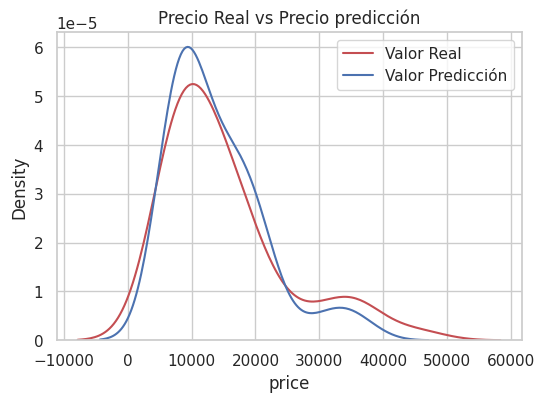

In [26]:
import seaborn as sns
plt.figure(figsize = (6, 4))

ax1 = sns.distplot( yAutosTest["price"], hist=False, color ="r")
ax1 = sns.distplot( yhat, hist=False, color="b", ax =ax1)

plt.title("Precio Real vs Precio predicción")
ax1.legend(labels=["Valor Real", "Valor Predicción"])

plt.show()
plt.close()

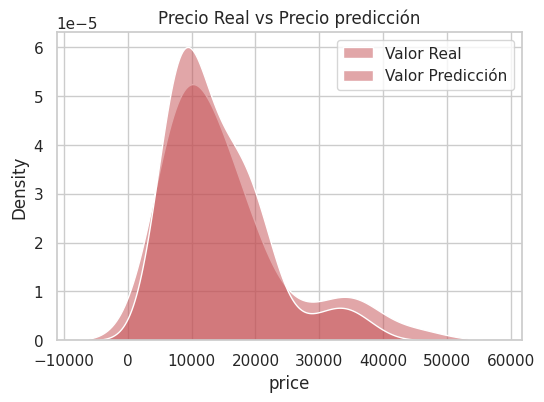

In [27]:
plt.figure(figsize = (6, 4))

ax1 = sns.kdeplot( yAutosTest["price"], multiple="stack", alpha=0.5 , color="r")
ax1 = sns.kdeplot( pd.Series(yhat.flatten()) , multiple="stack", alpha=0.5 , color="r" )

plt.title("Precio Real vs Precio predicción")
ax1.legend(labels=["Valor Real", "Valor Predicción"])

plt.show()
plt.close()